## Case de IA - Customer churn

<p align='center'>
    <img src='https://www.questionpro.com/blog/wp-content/uploads/2018/03/churn.png'>
</p>

Neste case básico de IA, vamos analisar um dataset de churn de clientes de uma empresa de telecomunicações. O objetivo é criar um modelo de Machine Learning que seja capaz de prever se um cliente irá ou não cancelar seu plano.


O objetivo é que você tenha seu primeiro contato com um problema de Machine Learning, que você consiga entender como é mais ou menos o fluxo de trabalho e, principalmente, vá aprendendo os principais conceitos conforme for realizando.


Ao longo do case passaremos por tópicos como:

1. Visualização, análise e tratamento de dados
2. Split dos dados em treino e teste
3. Padronização dos dados
4. Criação de um modelo de Machine Learning
5. Avaliação do modelo
6. Otimização dos hiperparâmetros do modelo


## Referências gerais:
- https://www.datacamp.com/tutorial/introduction-machine-learning-python
- https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn
- Livro: Introduction to Machine Learning with Python (Capítulo 2) - https://drive.google.com/drive/u/1/folders/10VdWCaR7qZ40K9rC5gWviKWMkMPzK8FB

Mais referências ao longo do case

### 0 - Antes de tudo...

Existem muitas formas de se resolver um problema de Machine Learning, no entanto, o **workflow** a ser seguido geralmente segue essa estrutura:
<p align='center'>
    <img src='https://editor.analyticsvidhya.com/uploads/80329Roadmap.PNG'>
</p>

Assim, comece importando as bibliotecas básicas, e carregando o dataset.

In [160]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap # criação da escala de cores
from math import ceil # para otimizar a criação de subplots
yellow = (1, 1, 0)  # amarelo
gray = (0.5, 0.5, 0.5)  # cinza
colors = [yellow, gray]

cmap_name = 'yellow_gray'
n_bins = 1000  # Número de cores na paleta
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

knn = KNeighborsClassifier(n_neighbors= 15)
#knn.fit(X,y)
#X_new = np.array([,
                   # ,])
#predictions = knn.predict(X_new)
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 0.3, random_state = 21, stratify = y)
# o random_state é um número de seed que divide os dados aleatoriamente e usar esse mesmo número permite que a gente reproduza os resultados posteriormente
# test_size = 30% é o tamanho da nossa amostra de teste
# é uma prática recomendada garantir que a nossa divisão reflita a proporção de rótulos em nossos dados

# tem dois grupos de coisas diferentes: tem os dados (X e y) e tem as labels pra x e y

# checando acurácia:
#knn.score(X_test, y_test)

# larger k = less complex model = can cause undeerfitting
# smaller k = more complex = can lead to overfitting, pq podem ser mais sensíveis ao ruído nos dados de treino, ao invés de refletirem tendências gerais

# também podemos interpretar k usando uma curva de complexidade do modelo. Podemos ir incrementnado k aos poucos e visualizar uma curva com os resultados

#train_accuracies = {}
#test_accuracies = {}
#neighbors = np.arange(1,26)

'''
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
plt.figure(figsize = (8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("No of neighbors")
plt.ylabel("Accuracy")
plt.show()
'''

'\nfor neighbor in neighbors:\n    knn = KNeighborsClassifier(n_neighbors = neighbor)\n    knn.fit(X_train, y_train)\n    train_accuracies[neighbor] = knn.score(X_train, y_train)\n    test_accuracies[neighbor] = knn.score(X_test, y_test)\nplt.figure(figsize = (8,6))\nplt.title("KNN: Varying Number of Neighbors")\nplt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")\nplt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")\nplt.legend()\nplt.xlabel("No of neighbors")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [161]:
np.arange(1, 12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [162]:
import pandas as pd
import numpy as np

### 1 - Data Prep

Provavelmente, a etapa mais importante do processo. É a etapa de entendimento do problema a ser resolvido, entendimento dos dados que você possui e, principalmente, tratamento desses dados para poder extrair o máximo de informação possível.

Veja aqui algumas referências para um bom Data Prep:
- https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
- https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

O objetivo aqui é verficar se os dados estão certinhos para serem utilizados em modelos. Assim,

- Verifique o tipo das variáveis (existem números como strings, por exemplo?)  
- Verifique se há valores nulos
- Verifique se há valores duplicados
- Verifique a presença de outliers (aqui pode ser bem útil plotar gráficos de distribuição das variáveis)
- Qual coluna é a variável *target* (aquilo que queremos prever)?
- Quais features são necessárias e quais não são?

In [163]:
file2read = r'C:\Users\USUARIO\Desktop\Cinthya\fea_dev\IA\Case IA\Churn_train.csv'
db = pd.read_csv(file2read)
db.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [164]:
db.shape

(440833, 12)

In [165]:
db.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [166]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [167]:
db.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


*De início*, não parece haver nenhum valor "min" e "max" estranho nas variáveis, como uma ```Usage Frequency``` > 100% ou ```Age``` < 18 ou > 90, por exemplo.

In [168]:
# Removendo linhas NaN
print(db.isna().sum())
quant_lines_before = db.shape[0]
db.dropna(inplace = True)
print(f"Foram removidas {quant_lines_before - db.shape[0]} linhas")

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
Foram removidas 1 linhas


In [169]:
# Removendo linhas duplicadas
quant_lines_before = db.shape[0]
db.drop_duplicates(inplace = True)
print(f"Foram removidas {quant_lines_before - db.shape[0]} linhas")

Foram removidas 0 linhas


In [170]:
# Verificando os valores das colunas categóricas para ver se tem algum outlier
print(db["Gender"].unique())
print(db["Subscription Type"].unique())
print(db['Contract Length'].unique())

# Verificando se Churn é sempre 0 ou 1
print(db['Churn'].unique())

['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']
[1. 0.]


**Obs.: vou criar duas cópias para deixar registrados alguns erros que eu cometi durante o caminho. Dessa forma, essa análise inicial vai usar três dfs: db, db1 e db2.**

In [171]:
# Fazendo uma cópia da db para eu poder reutilizar a versão original depois
db1, db2 = db.copy(), db.copy()

In [172]:
# Transformando as variáveis categóricas em numéricas
db.loc[db["Gender"]=='Female', "Gender"] = 0
db.loc[db["Gender"]=='Male', "Gender"] = 1

db.loc[db["Subscription Type"]=='Standard', "Subscription Type"] = 0
db.loc[db["Subscription Type"]=='Basic', "Subscription Type"] = 1
db.loc[db["Subscription Type"]=='Premium', "Subscription Type"] = 2

db.loc[db["Contract Length"]=='Annual', "Contract Length"] = 0
db.loc[db["Contract Length"]=='Monthly', "Contract Length"] = 1
db.loc[db["Contract Length"]=='Quarterly', "Contract Length"] = 2

db = db.astype(float)

In [173]:
db.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0.0,39.0,14.0,5.0,18.0,0.0,0.0,932.0,17.0,1.0
1,3.0,65.0,0.0,49.0,1.0,10.0,8.0,1.0,1.0,557.0,6.0,1.0
2,4.0,55.0,0.0,14.0,4.0,6.0,18.0,1.0,2.0,185.0,3.0,1.0
3,5.0,58.0,1.0,38.0,21.0,7.0,7.0,0.0,1.0,396.0,29.0,1.0
4,6.0,23.0,1.0,32.0,20.0,5.0,8.0,1.0,1.0,617.0,20.0,1.0


In [174]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  float64
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  float64
 8   Contract Length    440832 non-null  float64
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(12)
memory usage: 43.7 MB


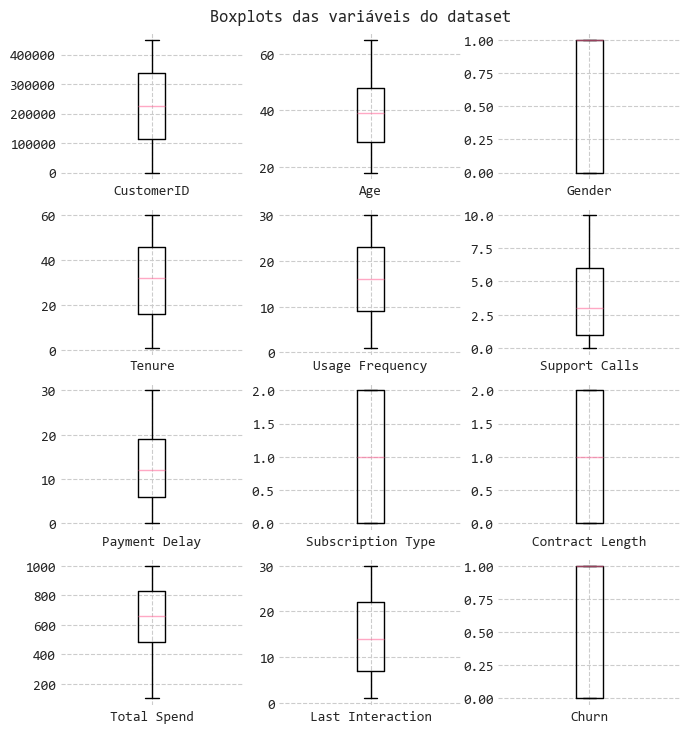

In [175]:
# Criando função que automaticamente remove da figura os subplots não utilizados
def remove_subplots_extra(df:pd.DataFrame, quant_cols:int, axis):
       quant_rows = ceil(len(df.columns)/3)
       
       # Deletando axis não utilizados
       total_axs = sum(len(ax_row) for ax_row in axis)
       quant_unused_axs = total_axs - len(df.columns)

       # Quantidade de linhas em que haverá remoção
       lines2remove = ceil(quant_unused_axs/3)

       # Quantidade de cols a remover da ultima linha
       cols2remove = quant_unused_axs%3 if quant_unused_axs%3!=0 else quant_unused_axs

       quant_rows, quant_cols = quant_rows - 1 , quant_cols - 1
       # Removendo subplopts desnecessários
       for row2remove in range(lines2remove):
              # Se for a última linha, remove a quantidade cols2remove de subplots
              if(row2remove == 0):
                     for col2remove in range(cols2remove):   
                            print(f"Removendo subplot = {quant_rows- row2remove, quant_cols - col2remove}")
                            fig.delaxes(axs[quant_rows - row2remove,quant_cols - col2remove])
                            
              # Se não for a última linha, remove todos os subplots dela         
              else:
                     for col2remove in range(quant_cols):
                            print(f"Removendo subplot = {row2remove, col2remove}")
                            fig.delaxes(axs[quant_rows - row2remove,quant_cols - col2remove])



# Plotando boxplots para verificar a presença de outliers
# Configurando o estilo dos gráficos

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
       # Criando paleta de cores
yellow = (1, 1, 0)  # amarelo
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['font.family'] = 'Consolas'
sns.set_style("whitegrid", {'grid.linestyle': '--', 'font.family': 'Consolas'})

quant_rows = round(len(db.columns)/3)
quant_cols = 3
fig, axs = plt.subplots(quant_rows, quant_cols, figsize = (8,8))
rows, cols = range(quant_rows), range(quant_cols)
row_col_pair = [[row, col] for row in rows for col in cols]
i = 0

for col in list(db.columns):
       axs[row_col_pair[i][0], row_col_pair[i][1]].boxplot(db[col], labels = [col])
       i+=1

# Add title and labels
#plt.title('Boxplot Example')
plt.suptitle("Boxplots das variáveis do dataset")
plt.subplots_adjust(top = 0.95)
remove_subplots_extra(db, quant_cols, axis = axs)
# Show plot
plt.show()


Nenhum dos boxplots apontou a presença de outlier.

Para auxiliar na inferência de quais variáveis serão feature e qual será target, vamos plotar um heatmap com as variáveis do dataset.

In [176]:
db.corr()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.181977,0.146922,0.044129,0.038455,-0.482894,-0.262029,0.000632,0.001050,0.359289,-0.125356,-0.839365
Age,-0.181977,1.000000,-0.031419,-0.011630,-0.007190,0.158451,0.061738,-0.000590,-0.000334,-0.084684,0.028980,0.218394
Gender,0.146922,-0.031419,1.000000,0.007978,0.007978,-0.091212,-0.048449,0.003256,-0.002120,0.066138,0.134786,-0.175395
Tenure,0.044129,-0.011630,0.007978,1.000000,-0.026800,-0.027640,-0.016588,-0.002201,-0.000702,0.019006,-0.006903,-0.051919
Usage Frequency,0.038455,-0.007190,0.007978,-0.026800,1.000000,-0.022013,-0.014470,0.000226,0.000321,0.018631,-0.004662,-0.046101
Support Calls,-0.482894,0.158451,-0.091212,-0.027640,-0.022013,1.000000,0.162889,-0.001014,0.000458,-0.221594,0.077684,0.574267
Payment Delay,-0.262029,0.061738,-0.048449,-0.016588,-0.014470,0.162889,1.000000,-0.001969,-0.000127,-0.121044,0.042708,0.312129
Subscription Type,0.000632,-0.000590,0.003256,-0.002201,0.000226,-0.001014,-0.001969,1.000000,-0.000495,-0.000358,-0.000154,-0.001046
Contract Length,0.001050,-0.000334,-0.002120,-0.000702,0.000321,0.000458,-0.000127,-0.000495,1.000000,-0.000642,-0.000035,-0.000093
Total Spend,0.359289,-0.084684,0.066138,0.019006,0.018631,-0.221594,-0.121044,-0.000358,-0.000642,1.000000,-0.056890,-0.429355


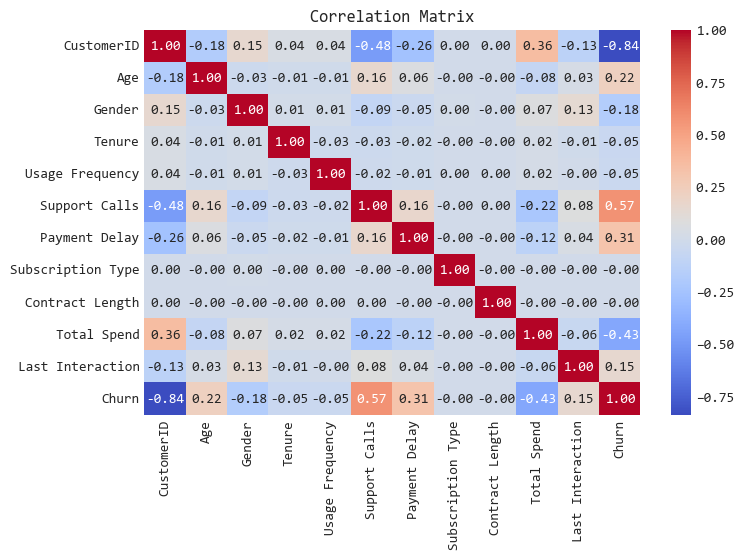

In [177]:
correlation_matrix = db.corr()

# Plot correlation matrix using seaborn's heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

A variável que desejamos prever (o target) é o ```churn```, ou seja, se o cliente se desligou do serviço ou não. A partir do heatmap, podemos notar que algumas variáveis são mais correlacionadas com o ```churn```:

* ```Support calls```: mais contatos com o suporte estão mais correlacionados a um ```churn``` = 1.
* ```Total spend```: maiores gastos com o serviço está mais correlacionado com um ```churn``` = 0.
* ```Payment delay```: atrasos de pagamento maiores estão mais correlacionados com um ```churn``` = 1.

Além destas, outras duas variáveis tem uma relação mais fraca:
* ```Age``` tem uma correlação positiva de 0.22 com ```churn```.
* ```Gender``` tem uma correlação negativa de -0.18 com ```churn```. Talvez homens tenham menos chance de encerrar o serviço?

De forma geral, eu manteria como features somente as três primeiras variáveis mencionadas.

### Encoding

Muitos algoritmos não conseguem trabalhar só com dados numéricos. Assim, um tratamento necessário é a transformação de variáveis categóricas em numéricas. 

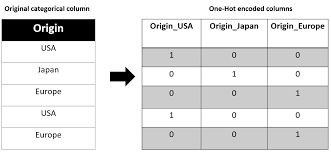

São formas de encoding mais comuns:
- Dummy encoding
- One-hot encoding
- Label encoding

Pesquise sobre esses métodos e veja qual a forma mais adequada para as variáveis categóricas

**Depois de pesquisar, eu percebi que eu acabei fazendo um label encoding para as variáveis categóricas. Entretanto, o meu label encoding de certa forma assume que há ordinarieadde entre as variáveis. Entretanto, eu nao sei dizer se um plano básico é melhor que um plano standard, ou se um plano monthly é melhor que um plano quarterly ou não.**

**Por essa razão, eu preferi fazer um hot encoding e dropei uma das colunas para evitar problemas de multicolineariedade.**

In [178]:
# Vou novamente usar dummy encoding para a variável age
# Hot encoding para as variáveis "Contract Length" e "Subscription Type"
db1

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [179]:
db1['Gender'] = db1['Gender'].map({'Female': 0, 'Male': 1})
cols2dummy = ['Subscription Type', 'Contract Length']
dummies =  pd.get_dummies(db1[cols2dummy], drop_first = True).astype(int)
db1 = pd.concat([db1, dummies], axis = 1).drop(cols2dummy, axis = 1)
db1


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0,1,0,0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,0,0,1,0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,0,0,0,1
3,5.0,58.0,1,38.0,21.0,7.0,7.0,396.00,29.0,1.0,0,1,1,0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,617.00,20.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,716.38,8.0,0.0,1,0,0,0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,1,0,0,0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,977.31,9.0,0.0,0,1,0,1
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,602.55,2.0,0.0,0,1,0,1


Removendo subplot = (4, 2)


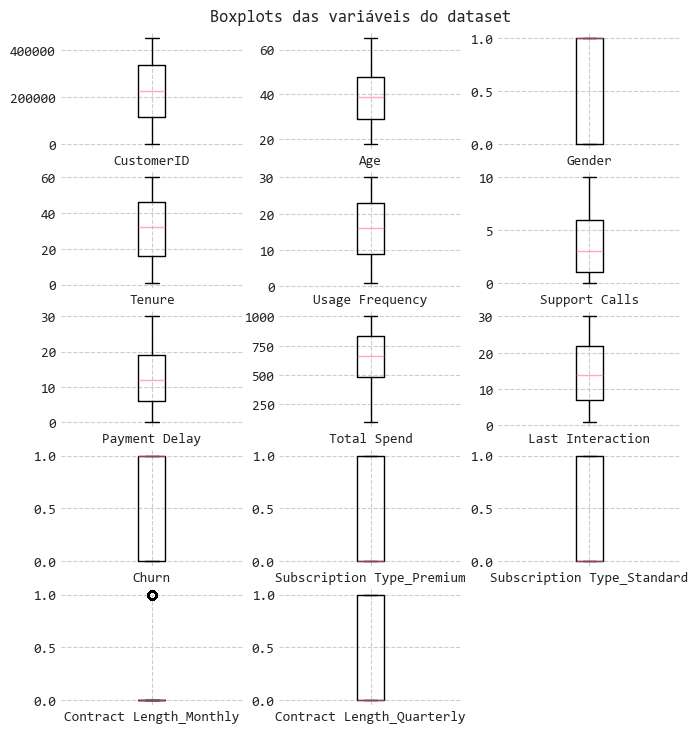

In [180]:
# Plotando boxplot novamente


quant_rows = round(len(db1.columns)/3)
quant_cols = 3
fig, axs = plt.subplots(quant_rows, quant_cols, figsize = (8,8))
rows, cols = range(quant_rows), range(quant_cols)
row_col_pair = [[row, col] for row in rows for col in cols]
i = 0

for col in list(db1.columns):
       axs[row_col_pair[i][0], row_col_pair[i][1]].boxplot(db1[col], labels = [col])
       i+=1

plt.suptitle("Boxplots das variáveis do dataset")
plt.subplots_adjust(top = 0.95)
remove_subplots_extra(db1, quant_cols, axis = axs)
plt.show()


In [181]:
# Obs: o "Contract Length_Monthly" com um outlier ali não é um problema porque é simplesmente uma questão da distribuição da variável. Como podemos ver, Contract Length_Montly está muito mais distribuído perto de 0 doque o COntract Length_Quarterly.
print(db1['Contract Length_Monthly'].value_counts())
print(db1['Contract Length_Monthly'].describe())
print(db1['Contract Length_Quarterly'].value_counts())
print(db1['Contract Length_Quarterly'].describe())

Contract Length_Monthly
0    353728
1     87104
Name: count, dtype: int64
count    440832.000000
mean          0.197590
std           0.398182
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Contract Length_Monthly, dtype: float64
Contract Length_Quarterly
0    264302
1    176530
Name: count, dtype: int64
count    440832.000000
mean          0.400447
std           0.489990
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Contract Length_Quarterly, dtype: float64


**DÚVIDA: o tipo de encoding afeta muito o desempenho do processamento?**

**DÚVIDA: é melhor criar as variáveis a partir do pandas do do scikit-learn? Achei o scikit-learn mais difícil**

**DÚVIDA: a diferença entre dummy encoding e hot encoding é que no dummy encoding a gente faz um hot encoding com apenas n-1 colunas?**

### Matriz de correlação
Uma forma eficiênte de se ter uma ideia da relação entre as variáveis é saber como elas se correlacionam umas com as outras. Plote uma matriz de correlação e veja quais variáveis parecem mais correlacionadas com o target.

**Ao plotar o heatmap denovo, eu percebi que ao dropar uma das colunas para as variáveis categóricas eu acabei perdendo a informação da correlação delas com a variável target.**

**Assim, depois desse heatmap, vou usar um outro dataframe em que eu não dropo uma das colunas e plotar o heatmap denovo, só para visualizar essa informação.**

**DÚVIDA: isso faz sentido?**

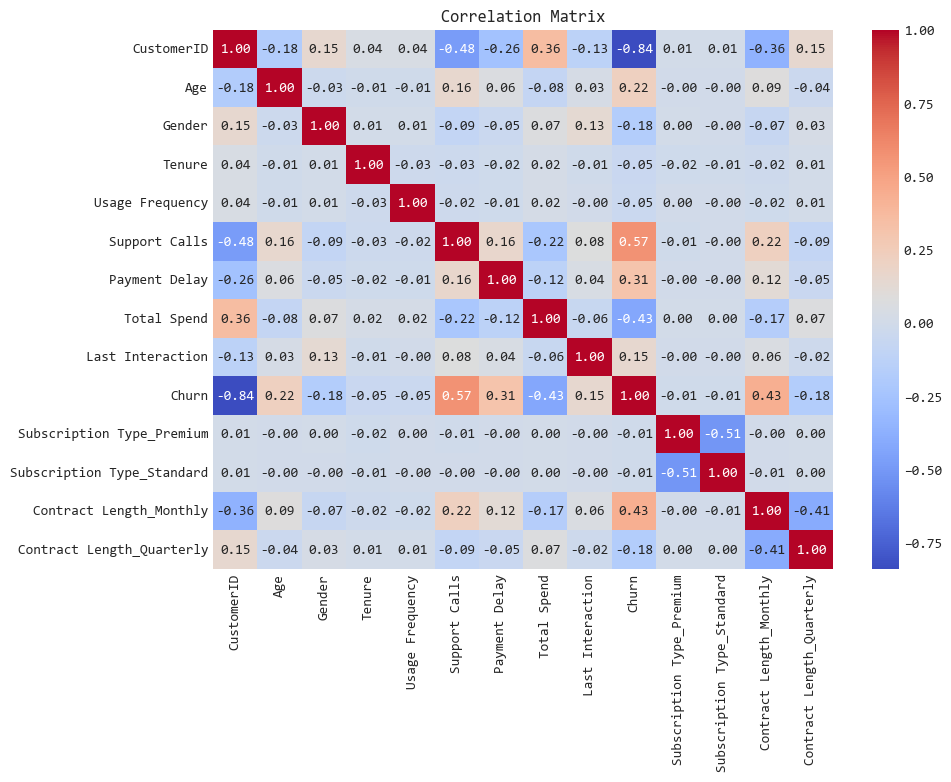

In [182]:
correlation_matrix = db1.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

**Plotando um heatmap denovo, mas dessa vez incluindo uma coluna dummy para cada variável a fim de enxergar a relação de cada opção das variáveis categóricas com o target.**

Removendo subplot = (5, 2)
Removendo subplot = (5, 1)


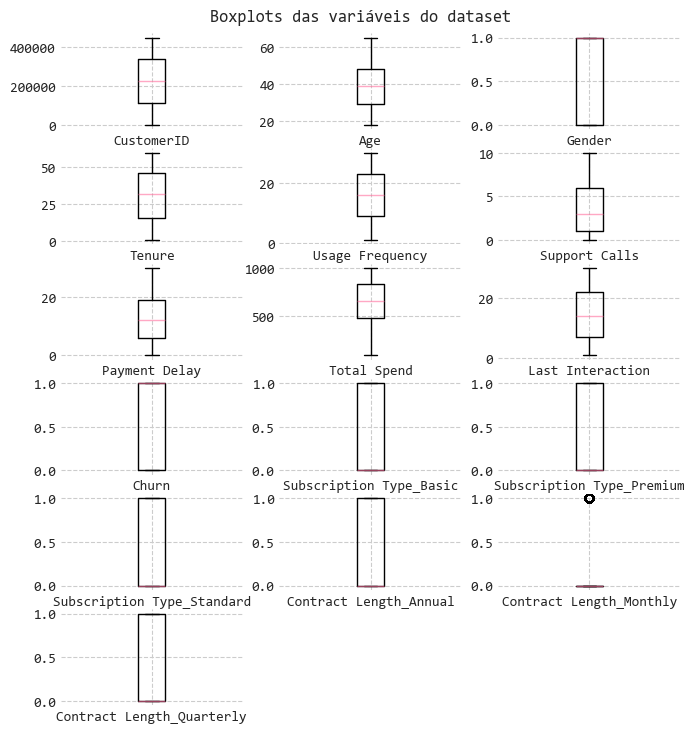

In [183]:
db2['Gender'] = db2['Gender'].map({'Female': 0, 'Male': 1})
cols2dummy = ['Subscription Type', 'Contract Length']
dummies =  pd.get_dummies(db2[cols2dummy]).astype(int) # dessa vez, não estou usando drop_first = True
db2 = pd.concat([db2, dummies], axis = 1).drop(cols2dummy, axis = 1)

# Plotando boxplot novamente
quant_rows = ceil(len(db2.columns)/3)
quant_cols = 3
fig, axs = plt.subplots(quant_rows, quant_cols, figsize = (8,8))
rows, cols = range(quant_rows), range(quant_cols)
row_col_pair = [[row, col] for row in rows for col in cols]
i = 0

for col in list(db2.columns):
       axs[row_col_pair[i][0], row_col_pair[i][1]].boxplot(db2[col], labels = [col])
       i+=1

plt.suptitle("Boxplots das variáveis do dataset")
plt.subplots_adjust(top = 0.95)
remove_subplots_extra(db2, quant_cols, axis = axs)
plt.show()


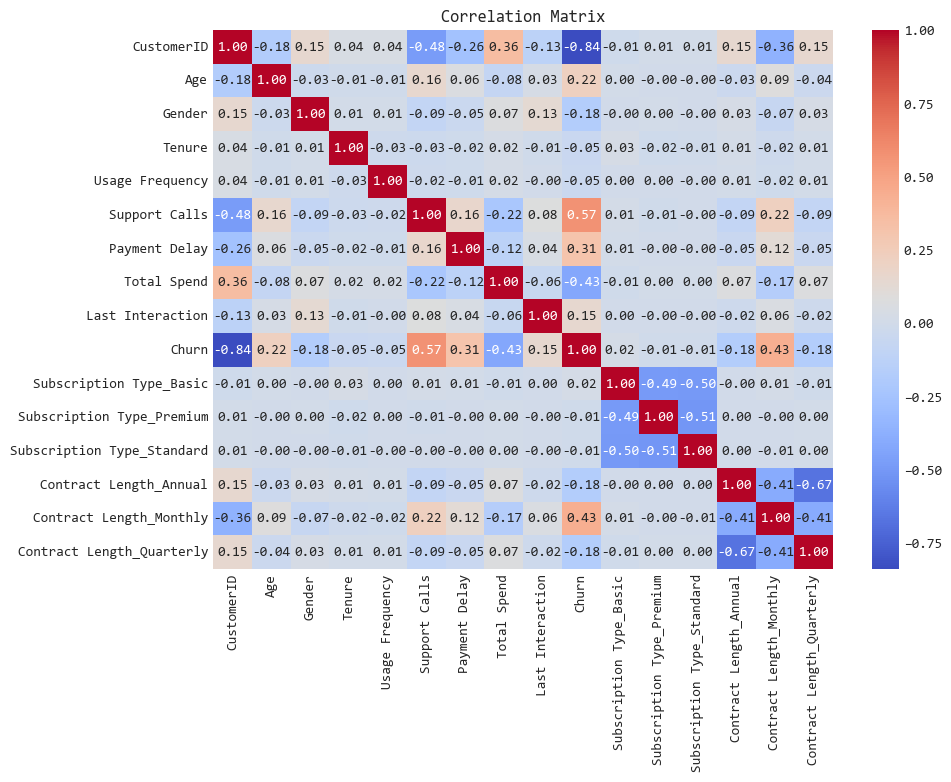

In [184]:
correlation_matrix = db2.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Novamente, partir do heatmap, podemos notar que algumas variáveis são mais correlacionadas com o ```churn```:

* ```Support calls```: mais contatos com o suporte estão mais correlacionados a um ```churn``` = 1.
* ```Contract Length Monthly```: contratos mensais estão fortemente correlacionados a um ```churn``` = 1.
* ```Total spend```: maiores gastos com o serviço está mais correlacionado com um ```churn``` = 0.
* ```Payment delay```: atrasos de pagamento maiores estão mais correlacionados com um ```churn``` = 1.

Além destas, outras duas variáveis tem uma relação mais fraca:
* ```Age``` tem uma correlação positiva de 0.22 com ```churn```.
* ```Gender``` tem uma correlação negativa de -0.18 com ```churn```. Talvez homens tenham menos chance de encerrar o serviço?

Interessantemente, o tipo de subscription no serviço não parece ter correlação significativa com o ```churn```.

Obs.: ```Customer ID``` tem uma forte correlação negativa, mas essa é uma variável que não explica nada sobre o cliente, pois tem um papel somente de indexação.

De forma geral, eu manteria como features somente as quatro primeiras variáveis mencionadas.

**Vou continuar usando o db1 (que tem ```drop_first = True```)**.


Para não inputar colunas que não informam muita coisa no algoritmo, vou usar só as quatro primeiras variáveis.

In [185]:
#set() method is used to convert any of the iterable to a sequence of iterable elements with distinct elements, commonly called Set. In Python, the set() function is a built-in constructor that is used to initialize a set
cols2keep = set(['Support Calls', 'Contract Length_Monthly', 'Total Spend', 'Payment Delay', 'Churn'])
all_cols = set(db1.columns)
cols2remove = all_cols - cols2keep
db1.drop(cols2remove, axis = 1, inplace = True)

In [186]:
db1

,Support Calls,Payment Delay,Total Spend,Churn,Contract Length_Monthly
0,5.0,18.0,932.00,1.0,0
1,10.0,8.0,557.00,1.0,1
2,6.0,18.0,185.00,1.0,0
3,7.0,7.0,396.00,1.0,1
4,5.0,8.0,617.00,1.0,1
...,...,...,...,...,...
440828,1.0,3.0,716.38,0.0,0
440829,1.0,20.0,745.38,0.0,0
440830,1.0,5.0,977.31,0.0,0
440831,2.0,0.0,602.55,0.0,0


### Data split
Para um algoritmo de Machine Learning funcionar, é necessário que ele primeiro aprenda com uma certa quantidade dos dados disponíveis a identificar padrões. A esse conjunto, chamamos de "treino".

Após o treino, é necessário verficar como ele lida diante de novos dados. Esse conjunto com a outra parte dos dados, chamamos de "teste". Sendo assim, divida seu dataset em treino e teste.

**DÚVIDA: qual % dos dados usar para treino?**

**DÚVIDA: qual é a do conceito de data leakage? por que dividir o dataset entre teste e treino antes de fazer algumas coisas é importante?**

In [187]:
from sklearn.model_selection import train_test_split
X_columns = list(cols2keep)
X_columns.remove("Churn")
X = db1[X_columns]
y = db1['Churn']
pct_teste = 0.2
print(f"Utilizará se {pct_teste*100}% dos dados como teste, ou {round(pct_teste*db1.shape[0])}/{db1.shape[0]} observações")
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 0.3, random_state = 21, stratify = y)

['Payment Delay', 'Total Spend', 'Contract Length_Monthly', 'Support Calls']
Utilizará se 20.0% dos dados como teste, ou 88166.40000000001 observações


### Scaling
Último ponto dessa etapa. Veja que as variáveis possuem escalas diferentes. Enquanto algumas variáveis estão na casa das dezenas, outras estão na casa das centenas. Isso pode ser um problema para alguns algoritmos de Machine Learning, que podem acabar dando mais importância para as variáveis com maior escala. Transforme seus dados de modo com que fiquem na mesma escala

Dica: se achar necessário, pesquise mais afundo sobre métodos de dimensionamento como Min-Max Scaler e Standard Scaler, identificando as aplicações de cada um e qual se encaixa melhor no seu problema

**As escalas muito diferentes em cada variável podem ser um problema porque alguns modelos, como o KNN (K-enarest neighbor) usam a distância entre os pontos explicitamente para conseguir classificar cada observação. Por isso, pode ser desejável que as features estejam em escalas semelhantes. Assim, podemos normalizar ou padronizar os dados (normalizing or standardizing)**

Removendo subplot = (1, 2)


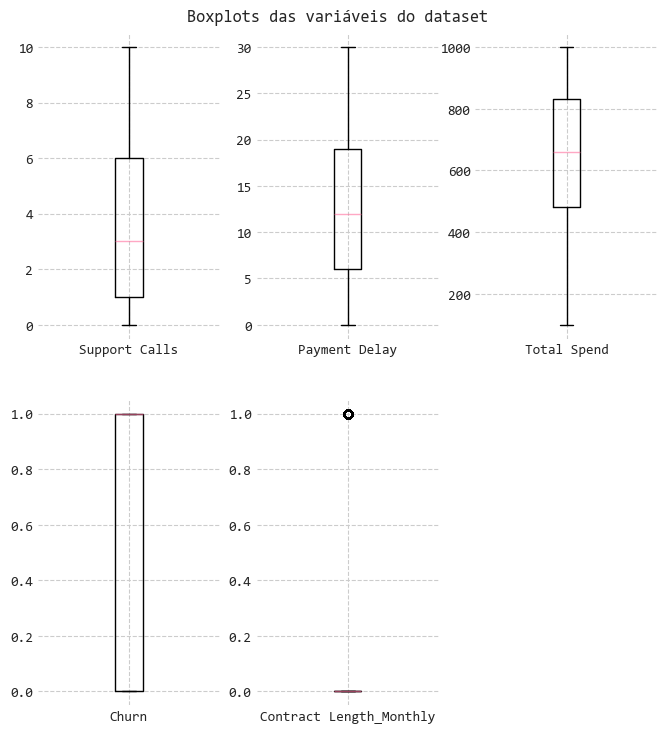

In [191]:

# Plotando boxplot novamente para visualizar as diferenças de escala
quant_rows = ceil(len(db1.columns)/3)
quant_cols = 3
fig, axs = plt.subplots(quant_rows, quant_cols, figsize = (8,8))
rows, cols = range(quant_rows), range(quant_cols)
row_col_pair = [[row, col] for row in rows for col in cols]
i = 0

for col in list(db1.columns):
       axs[row_col_pair[i][0], row_col_pair[i][1]].boxplot(db1[col], labels = [col])
       i+=1

plt.suptitle("Boxplots das variáveis do dataset")
plt.subplots_adjust(top = 0.95)
remove_subplots_extra(db1, quant_cols, axis = axs)
plt.show()

### 2 - Criação do modelo

Existem dois principais tipos de problemas de ML: regressão e classificação. Enquanto o primeiro se refere à previsão de valores numéricos, o segundo, como o nome já diz, se refere à classificação de valores em categorias.

Para classificação, existem alguns algoritmos mais comuns que você pode tentar:

Cursos:
- [Supervised Learning with scikit-learn - DataCamp](https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn)
- [Linear Classifiers in python - DataCamp](https://app.datacamp.com/learn/courses/linear-classifiers-in-python)

Vídeos:
- [Vídeo da Dev sobre Random Forest](https://www.youtube.com/watch?v=ho1eI54ykoU&pp=ygUHZmVhIGRldg%3D%3D)
- [StatsQuest: LogisticRegression (teoria)](https://www.youtube.com/watch?v=yIYKR4sgzI8)
- [StatsQuest: KNN (teoria)](https://www.youtube.com/watch?v=HVXime0nQeI&pp=ugMICgJwdBABGAE%3D)


Escolha pelo menos dois modelos. Treine e teste com os dados que você separou anteriormente e gere as previsões

In [1]:
# quero usar um modelo de labeling.

In [3]:
a = input()
a

'2'

### 3 - Avaliação do modelo

Uma vez feitas as previsões, é preciso verificar o quão próximas da realidade elas foram. Para problemas de classificação, as métricas mais comuns de se utilizar são: acurácia, precisão e AUC. Você pode ter uma melhor visualização nesse cheat sheet:

<p align='center'>
    <img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*wEniP5HewaUSHeIF1_bEiw.png'>

Para um entendimento mais profundo sobre cada uma das métricas, seguem também algumas referências:

- [StatsQuest: ROC e AUC](https://www.youtube.com/watch?v=4jRBRDbJemM&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=7)
- [StatsQuest: Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=3)
- [12 Important Model Evaluation Metrics for Machine Learning Everyone Should Know ](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/)

**Avalie as previsões do seu modelo e veja qual deles se saiu melhor.**

### 4 - Otimização do modelo
Cada função do scikit-learn na verdade tem vários parâmetros que podem ser ajustados a depender dos seus dados e do seu objetivo e nem sempre os valores padrão são os melhores. O processo de otimização desses hiperparâmetros nada mais é do que iterar sobre as diferentes possibilidades de valores que esses parâmetros podem assumir e ver qual combinação deles gera o melhor resultado.

A forma mais comum de realizar essa otimização é através do GridSearchCV, mas a biblioteca Optuna também é uma excelente opção.

O capítulo 3 do curso de Supervised Learning oferece um guia de como realizar esse processo - https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

**Realize a otimização dos hiperparâmetros**

### Hyperparameter tunning